You can find dataset description here https://archive.ics.uci.edu/ml/datasets/Student+Performance. Data is in "Data Folder" name "student.zip"

## How to complete this assignment

First download the data and extract two tables from the link above. Then complete 9 graded tasks below, the score is given in brackets. Finally submit the resulting `.ipynb` file to rs-app Auto-test.
- **Do not delete or rename the variables** given before the inscription '#your code here', they are needed for correct verification.
- **Do not change the code** in the last Notebook cell, it is required for server side.
- Your **Notebook must run completely without errors** in order to be graded! Please check everything before submission by going _Cell_ -> _Run All_

## Here goes!

### Import necessary libraries 

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the data

In [54]:
mat = pd.read_csv("student-mat.csv", sep=";")
por = pd.read_csv("student-por.csv", sep=";")

### Look at first five rows of table with students math grades. In all other tasks, unless otherwise stated, we use it.

In [55]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Task 1 (0.25 points).** Count number of boys and girls in the dataset.

In [56]:
boys, girls = mat[mat.sex == 'M']['sex'].count(), mat[mat.sex == 'F']['sex'].count()

**Task 2 (0.25 points).** Count number of 17 year old students having math grade G3 between 10 and 15 inclusively 

In [57]:
students_17_year_old = mat[(mat.age == 17) & (mat.G3 >= 10) & (mat.G3 <= 15)]['G3'].count()

**Task 3 (0.5 points).** List top-10 students having biggest average grade (G1, G2, G3)  in math. Count number of boys from that list.

In [58]:
mat['average_G'] = (mat.G1 + mat.G2 + mat.G3)/3

In [59]:
mat.sort_values(by=['average_G'], ascending=False).head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_G
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,1,1,2,4,19,19,20,19.333333
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,3,1,1,4,6,18,19,19,18.666667
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,5,2,1,1,3,10,18,19,19,18.666667
374,MS,F,18,R,LE3,T,4,4,other,other,...,4,4,1,1,1,0,19,18,19,18.666667
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,3,3,1,1,5,2,19,18,18,18.333333
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,3,3,1,2,2,5,18,18,19,18.333333
293,GP,F,17,R,LE3,T,3,1,services,other,...,1,2,1,1,3,6,18,18,18,18.000000
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,...,5,5,2,5,4,8,18,18,18,18.000000
245,GP,M,16,U,GT3,T,2,1,other,other,...,3,3,1,1,4,6,18,18,18,18.000000
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,2,4,2,3,2,24,18,18,18,18.000000


In [60]:
boys_from_top_10 = mat.sort_values(by=['average_G'], ascending=False).head(10)[mat.sex == 'M']['sex'].count()

<ipython-input-60-c5efb1045cc8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  boys_from_top_10 = mat.sort_values(by=['average_G'], ascending=False).head(10)[mat.sex == 'M']['sex'].count()


**Task 4 (1 point).** Count mean and standard deviation of absences for students with romantic relationship and access to internet

In [61]:
mat.drop('average_G', axis=1, inplace=True)
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [62]:
mat[['romantic','internet']]
print(mat[(mat.romantic == 'yes') & (mat.internet == 'yes')]['absences'].mean())
print(mat[(mat.romantic == 'yes') & (mat.internet == 'yes')]['absences'].std())

8.155172413793103
11.25329203873895


In [63]:
mean, std = mat[(mat.romantic == 'yes') & (mat.internet == 'yes')]['absences'].mean(), mat[(mat.romantic == 'yes') & (mat.internet == 'yes')]['absences'].std()

**Task 5 (1.5 points).** Count number of students for each existing age. Return list with counts sorted by students age in ascending order.

Note: On 0 index in list we have number of 15 year old students, on 1st index number of 16 year old students, ...

In [64]:
set(mat.age.values)

{15, 16, 17, 18, 19, 20, 21, 22}

In [65]:
[mat[mat.age == x]['age'].count() for x in set(mat.age.values)]

[82, 104, 98, 82, 24, 3, 1, 1]

In [66]:
student_counts_for_each_age = [mat[mat.age == x]['age'].count() for x in set(mat.age.values)]

**Task 6* (2 points).** Find most frequent pair (Fjob, Mjob) of students from math grade table.

Note 1: Do not take student into account if at least one of parents job name is "other". <br>
Note 2: Pairs (Fjob: teacher, Mjob: at_home) and (Fjob: at_home, Mjob: teacher) are different and their occurrences should be counted separately.

Hint: groupby (Fjob, Mjob), count rows, descending sort by count, reset_index, take first row values.

In [67]:
mat[['Fjob','Mjob']].nunique()

Fjob    5
Mjob    5
dtype: int64

In [68]:
pd.crosstab(mat['Mjob'], mat['Fjob'])

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,7,2,33,15,2
health,0,6,17,10,1
other,5,2,104,24,6
services,6,4,42,43,8
teacher,2,4,21,19,12


In [69]:
mat.groupby(by=['Fjob','Mjob']).count()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
Fjob     Mjob                                                                
at_home  at_home        7    7    7        7        7        7     7     7   
         other          5    5    5        5        5        5     5     5   
         services       6    6    6        6        6        6     6     6   
         teacher        2    2    2        2        2        2     2     2   
health   at_home        2    2    2        2        2        2     2     2   
         health         6    6    6        6        6        6     6     6   
         other          2    2    2        2        2        2     2     2   
         services       4    4    4        4        4        4     4     4   
         teacher        4    4    4        4        4        4     4     4   
other    at_home       33   33   33       33       33       33    33    33   
         health        17   17   17       17       17       17    17    17   
         other        104  104  104      104      104      104   104   104   
         services      42   42   42       42       42       42    42    42   
         teacher       21   21   21       21       21       21    21    21   
services at_home       15   15   15       15       15       15    15    15   
         health        10   10   10       10       10       10    10    10   
         other         24   24   24       24       24       24    24    24   
         services      43   43   43       43       43       43    43    43   
         teacher       19   19   19       19       19       19    19    19   
teacher  at_home        2    2    2        2        2        2     2     2   
         health         1    1    1        1        1        1     1     1   
         other          6    6    6        6        6        6     6     6   
         services       8    8    8        8        8        8     8     8   
         teacher       12   12   12       12       12       12    12    12   

                   reason  guardian  ...  famrel  freetime  goout  Dalc  Walc  \
Fjob     Mjob                        ...                                        
at_home  at_home        7         7  ...       7         7      7     7     7   
         other          5         5  ...       5         5      5     5     5   
         services       6         6  ...       6         6      6     6     6   
         teacher        2         2  ...       2         2      2     2     2   
health   at_home        2         2  ...       2         2      2     2     2   
         health         6         6  ...       6         6      6     6     6   
         other          2         2  ...       2         2      2     2     2   
         services       4         4  ...       4         4      4     4     4   
         teacher        4         4  ...       4         4      4     4     4   
other    at_home       33        33  ...      33        33     33    33    33   
         health        17        17  ...      17        17     17    17    17   
         other        104       104  ...     104       104    104   104   104   
         services      42        42  ...      42        42     42    42    42   
         teacher       21        21  ...      21        21     21    21    21   
services at_home       15        15  ...      15        15     15    15    15   
         health        10        10  ...      10        10     10    10    10   
         other         24        24  ...      24        24     24    24    24   
         services      43        43  ...      43        43     43    43    43   
         teacher       19        19  ...      19        19     19    19    19   
teacher  at_home        2         2  ...       2         2      2     2     2   
         health         1         1  ...       1         1      1     1     1   
         other          6         6  ...       6         6      6     6     6   
         services       8         8  ...      

In [70]:
father, mother = 'services', 'services'

**Task 7 (1 point).** Count number of students presenting both in mat and por tables.

_Note 1_: That's a pity that tables haven't foreign keys for joining together. The uniqueness of the student is determined by the uniqueness of the set of all fields except subject fields (G1, G2, G3). <br>
_Note 2_: Finally you'd better to come up with table having all student personal information and non-null grades in math ["G1_mat", "G2_mat", "G3_mat"] and ["G1_por", "G2_por", "G3_por"]. Joined dataframe could be helpful for further usage. <br>
Note 3: probably you would like to use "merge" to avoid duplicating column names from right and left dataframe.

In [71]:
mat.rename(columns={'G1':'G1_mat', 'G2':'G2_mat', 'G3':'G3_mat'}, inplace=True)
por.rename(columns={'G1':'G1_por', 'G2':'G2_por', 'G3':'G3_por'}, inplace=True)

In [72]:
mat_por = mat.merge(por, how='inner')

In [73]:
len(mat_por.index)

39

In [74]:
both_present = len(mat_por.index)

**Task 8 (1.5 points).** Find absolute differences between average mat and por student final grades for each school (GP & MS)

In [75]:
avr_mat_gp = mat[['G3_mat']][mat.school == 'GP'].mean().sum()
avr_mat_ms = mat[['G3_mat']][mat.school == 'MS'].mean().sum()
avr_por_gp = por[['G3_por']][por.school == 'GP'].mean().sum()
avr_por_ms = por[['G3_por']][por.school == 'MS'].mean().sum()

In [76]:
GP_diff, MS_diff = abs(avr_mat_gp - avr_por_gp), abs(avr_mat_ms - avr_por_ms)

**Task 9* (2 points).** Find top-5 linearly dependent pairs of numeric student features from mat table.

_Note 1_: Use absolute Peason correlation value for measuring the linear relationship between features.

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficients, but the most popular is Pearson’s. It can take value from -1 to 1 inclusive. 
 - A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
 - A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
 - Zero means that for every increase of one variable we do not expect always increase or decrease of another variable. It is not a proof, that variables are not related with each other. That only means NO LINEAR relationship between them. Suppose we have variables x and y connected by a sinusoidal law $y=sin(x)$. There is obvious no linear relationship between them (for $x \in [0, \frac{\pi}{2}]$ y increases unevenly ant later for $x \in [\frac{\pi}{2}, \pi]$ y decreases unevenly). Even though they relate to each other by more complex law.
 
More mathematical explanation https://en.wikipedia.org/wiki/Correlation_and_dependence.

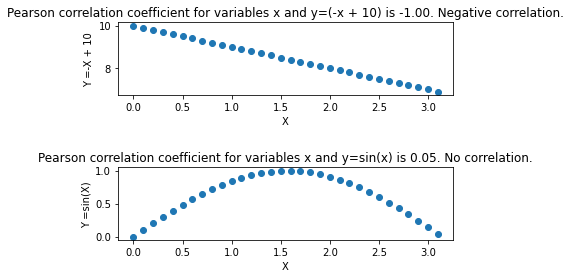

In [77]:
# Just a short example
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(np.arange(0, 314, 10)) / 100
y1 = -x + 10
y2 = np.sin(x)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x, -x + 10)
ax1.set_title("Pearson correlation coefficient for variables x and y=(-x + 10) is %.2f. Negative correlation."
      % np.corrcoef(x, y1)[0][1])
ax1.set_xlabel("X")
ax1.set_ylabel("Y =-X + 10")
ax2.scatter(x, y2)
ax2.set_title("Pearson correlation coefficient for variables x and y=sin(x) is %.2f. No correlation."
      % np.corrcoef(x, y2)[0][1])
ax2.set_xlabel("X")
ax2.set_ylabel("Y =sin(X)")

plt.subplots_adjust(hspace=1.0)
plt.show()

_Note 2_: Use Pandas _.corrcoef_  for calculating Pearson correlation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html. Return list of lists of column name pairs by absolute correlation value in descending order. Each pair of names should follow the alphabet order.

In [78]:
num_list = []
obj_list = []
for i in mat.columns:
    if mat[i].dtype == 'int64':
        num_list.append(i)
    else:
        obj_list.append(i)

In [79]:
pear_corr = mat.corr(method='pearson')

In [80]:
pear_corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [81]:
df_corr = pd.DataFrame()
for u,i in enumerate(num_list):
    print(i, pear_corr[i].sort_values(ascending=False).index[1], pear_corr[i].sort_values(ascending=False)[1])
    df_corr[u] = [i, pear_corr[i].sort_values(ascending=False).index[1], pear_corr[i].sort_values(ascending=False)[1]]
    df_corr[u+1] = [i, pear_corr[i].sort_values(ascending=False).index[2], pear_corr[i].sort_values(ascending=False)[2]]

age failures 0.24366537664172075
Medu Fedu 0.6234551120806447
Fedu Medu 0.6234551120806447
traveltime Dalc 0.13832530898949427
studytime G1_mat 0.1606119154546959
failures age 0.24366537664172075
famrel freetime 0.15070144377905104
freetime goout 0.28501871496820297
goout Walc 0.4203857454717892
Dalc Walc 0.647544230018008
Walc Dalc 0.647544230018008
health famrel 0.09405572832242182
absences age 0.17523007904603108
G1_mat G2_mat 0.8521180663648036
G2_mat G3_mat 0.9048679892693007
G3_mat G2_mat 0.9048679892693007


In [82]:
df_corr = df_corr.transpose()
df_corr.sort_values(by=[2, 0, 1],ascending=False, inplace=True)

In [83]:
sorted(list(set(df_corr[2])),reverse=True)[:5]

[0.9048679892693007,
 0.8521180663648036,
 0.8014679320174155,
 0.647544230018008,
 0.6234551120806447]

In [84]:
df_corr

,0,1,2
15,G3_mat,G2_mat,0.904868
14,G2_mat,G3_mat,0.904868
13,G1_mat,G2_mat,0.852118
16,G3_mat,G1_mat,0.801468
10,Walc,Dalc,0.647544
9,Dalc,Walc,0.647544
1,Medu,Fedu,0.623455
2,Fedu,Medu,0.623455
8,goout,Walc,0.420386
7,freetime,goout,0.285019


In [85]:
top5_correlations = [['G2', 'G3'], ['G1', 'G2'], ['G1', 'G3'], ['Dalc', 'Walc'], ['Fedu', 'Medu']]

**Task 10 (bonus no grading).** Plot 5 scatterplots showing relationship between most correlated pairs of variables from the previous task.

<AxesSubplot:>

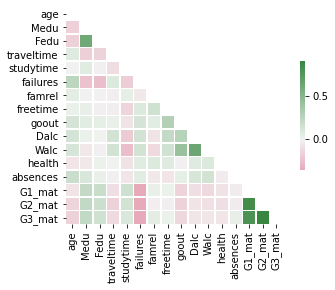

In [86]:
mask = np.triu(np.ones_like(pear_corr, dtype=bool))
cmap = sns.diverging_palette(1, 130, as_cmap=True)
sns.heatmap(pear_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Warning! Do not change anything in this area.

In [87]:
with open('student_answers.txt', 'w') as file:
    file.write(f"{boys} {girls}\n")
    file.write(f"{students_17_year_old}\n")
    file.write(f"{boys_from_top_10}\n")
    file.write(f"{round(mean, 3)} {round(std, 3)}\n")
    file.write(f"{student_counts_for_each_age}\n")
    file.write(f"{father} {mother}\n")
    file.write(f"{both_present}\n")
    file.write(f"{round(GP_diff, 3)} {round(MS_diff, 3)}\n")
    file.write(f"{top5_correlations}")